# Zyfra Gold ML

Our goal with Zyfra is to prepare our data, analyze, and build a working ML model. We will use the instructions provided to us for our guideline for the project.

## Prepare the Data

### Open the files and look into the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

try:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    df_train = pd.read_csv('/gold_recovery_train.csv')
    df_test = pd.read_csv('/gold_recovery_test.csv')
    df_full = pd.read_csv('/gold_recovery_full.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

### Check that recovery is calculated correctly

In [9]:
# Defining variables for recovery
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

# Finding recovery and MAE
lambda_var = (C * (F - T)) / (F * (C - T)) * 100
mae = (lambda_var - df_train['rougher.output.recovery']).abs().sum()

print('MAE: ', mae)

MAE:  1.3493917094820063e-10


Our MAE is an extraordinarily small number, indicating near-perfect recovery calculations.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

### Analyze the features not available in the test set

In [10]:
# Checking for missing columns
print(df_train.columns.difference(df_test.columns))

#df_train = df_train.drop(df_train.columns.difference(df_test.columns), axis=1)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

There's a noticable amount of columns in one of the dataframes but not the other. These columns have been dropped.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Yep! It should be noted that all these columns are either outputs of the process or calculations based on them, which means they can't be used in our model

</div>

### Perform data preprocessing

In [11]:
# Turning our dates into panda's datetime
for dataframe in [df_train, df_test, df_full]:
    dataframe['date'] = pd.to_datetime(dataframe['date'])

In [12]:
# Checking for missing row counts
df_train.describe().head(1)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.0,16788.0,16490.0,16789.0,15339.0,16794.0,16677.0,16715.0,16794.0,15553.0,...,16731.0,16747.0,16768.0,16767.0,16775.0,16775.0,16775.0,16776.0,16757.0,16775.0


In [13]:
# Checking for missing row counts
df_test.describe().head(1)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.0,5572.0,5856.0,5690.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,...,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0,5840.0


In [14]:
# Filling missing values
df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

In [15]:
# Merging to replace missing values
df_full_merge = df_full[['date', 'rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au',
                        'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 
                         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 
                         'final.output.concentrate_sol']]

df_test = df_test.merge(df_full_merge, on='date', how='left')
df_full_merge = df_full_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [16]:
# Dropping useless column 'date'
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)
df_full = df_full.drop('date', axis=1)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Preprocessing looks good! Missing values were dealt with reasonably, and you correctly merged the target columns with the test dataframe

</div>

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [17]:
# Prepping for plotting
metal_au = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                    'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
metal_ag = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                    'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
metal_pb = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                    'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

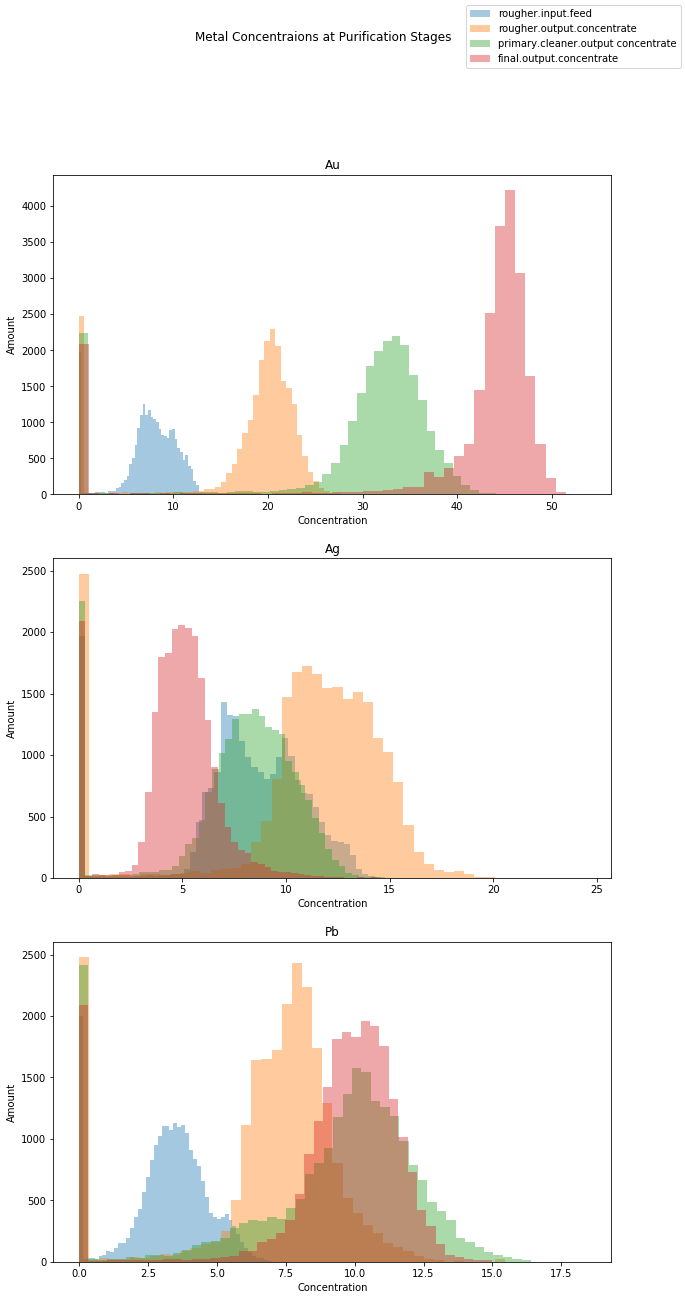

In [18]:
# Plotting metal concentrations
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for column in list(metal_au):
    sns.distplot(metal_au[column], ax=axes[0], kde=False)
axes[0].set(title='Au', xlabel='Concentration', ylabel='Amount')
for column in list(metal_ag):
    sns.distplot(metal_ag[column], ax=axes[1], kde=False)
axes[1].set(title='Ag', xlabel='Concentration', ylabel='Amount')
for column in list(metal_pb):
    sns.distplot(metal_pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel='Concentration', ylabel='Amount')
fig.suptitle('Metal Concentraions at Purification Stages')
fig.legend(['rougher.input.feed', 'rougher.output.concentrate', 'primary.cleaner.output concentrate',
            'final.output.concentrate',])
fig.show()

There are a lot of values on each graph of concentration for 0. This likely indicates outliers. As for actual concentrations, on some graphs there's overlaps and for Au the concentrations have much less overlap.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The plots are correct, but what are your conclusions? :)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

### Compare the feed particle size distributions in the training set and in the test set

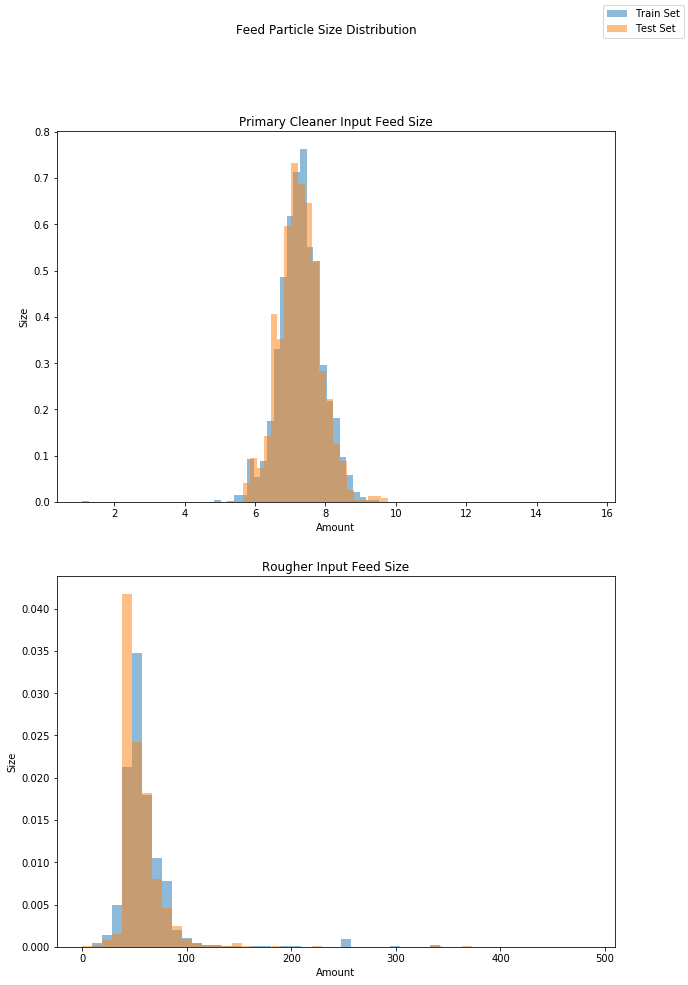

In [19]:
# Plotting feed distributions
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[0].hist(df_train['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].hist(df_test['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].set(title='Primary Cleaner Input Feed Size', xlabel='Amount', ylabel='Size')
axes[1].hist(df_train['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].hist(df_test['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].set(title='Rougher Input Feed Size', xlabel='Amount', ylabel='Size')
fig.suptitle('Feed Particle Size Distribution')
fig.legend(['Train Set', 'Test Set'])
fig.show()

There is significant but not perfect overlap between the test and training set. This shows that there is enough reasonable variation that the values in each set are likely correctly done and can be used for our ML and testing.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

As in the previous task, please share your conclusions!

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good!

</div>

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution?

In [20]:
# Def for selecting raw feed
def raw_feed(df):
    return df['rougher.input.feed_au'] + df['rougher.input.feed_ag'] + df[
        'rougher.input.feed_pb'] + df['rougher.input.feed_sol']

In [21]:
# Def for selecting rough concentrate
def rougher_conc(df):
    return df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_ag'] + df[
        'rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol']

In [22]:
# Def for selecting final concentrate
def final_conc(df):
    return df['final.output.concentrate_au'] + df['final.output.concentrate_ag'] + df[
        'final.output.concentrate_pb'] + df['final.output.concentrate_sol']

In [23]:
# Defining variables using previous defs for plotting
df_full['rougher.input.feed'] = raw_feed(df_full)
df_full['rougher.output.concentrate'] = rougher_conc(df_full)
df_full['final.output.concentrate'] = final_conc(df_full)
total_conc = df_full[['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']]

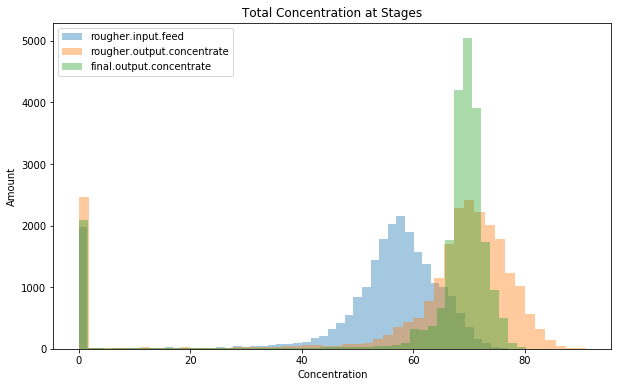

In [24]:
fig = plt.figure(figsize=(10, 6))
for column in list(total_conc):
    sns.distplot(total_conc[column], kde=False)
plt.legend(list(total_conc))
plt.title('Total Concentration at Stages')
plt.xlabel('Concentration')
plt.ylabel('Amount')
fig.show()

The final output concentration is significantly higher than the rest of the concentrations throughout the process. There is also fair overlap, but the input stage has a lower value of concentration than the rest of the process.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Great, you calculated the total concentrations and plotted them. What conclusions can we make? Are there any abnormal values?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

## Build the model

### Write a function to calculate the final sMAPE value

In [25]:
# sMAPE defs
def smape(y_true, y_pred):
    return (np.abs(y_true - y_pred)/((np.abs(y_true)+np.abs(y_pred))/2)).mean()

def smape_final(y_true,y_pred):
    smape_out_rougher = smape(y_true[:,1],y_pred[:,1])
    smape_out_final = smape(y_true[:,0],y_pred[:,0])
    return 0.25*smape_out_rougher + 0.75*smape_out_final

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The functions for SMAPE calculation are correct, assuming that `final.output.concentrate` is the first target column, and `rougher.output.concentrate` is the second target column, but you actually used a different order:
    
```python
target_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]
```

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample

In [26]:
# Defining out raw, rough, and final concentration columns for the train set
df_train['rougher.input.feed'] = raw_feed(df_train)
df_train['rougher.output.concentrate'] = rougher_conc(df_train)
df_train['final.output.concentrate'] = final_conc(df_train)

# Dropping outliers in our new concentration columns
df_train = df_train[(df_train['rougher.input.feed'] > 20) & (df_train['rougher.output.concentrate'] > 20) & 
                      (df_train['final.output.concentrate'] > 20)]

# Defining out raw, rough, and final concentration columns for the test set
df_test['rougher.input.feed'] = raw_feed(df_test)
df_test['rougher.output.concentrate'] = rougher_conc(df_test)
df_test['final.output.concentrate'] = final_conc(df_test)

# Dropping outliers in our new concentration columns
df_test = df_test[(df_test['rougher.input.feed'] > 20) & 
                  (df_test['rougher.output.concentrate'] > 20) & (df_test['final.output.concentrate'] > 20)]

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, only the original test set columns are used!

</div>

In [27]:
# Defining our random state value for our models
state = np.random.RandomState(12345)

In [28]:
# Defining variables for our function and ML model
features_train = pd.DataFrame(df_train.drop(columns=['final.output.concentrate', 'rougher.output.concentrate'], axis=1))
target_train = pd.DataFrame(df_train[['final.output.concentrate', 'rougher.output.concentrate']])

features_test = df_test.drop(columns=['final.output.concentrate', 'rougher.output.concentrate'], axis=1)
target_test = df_test[['final.output.concentrate', 'rougher.output.concentrate']]

In [29]:
# Fixing our column differences so there aren't any errors
features_train = features_train.drop(features_train.columns.difference(features_test.columns), axis=1)

In [30]:
# Scaling our features
feature_scaler = StandardScaler()
features_train = pd.DataFrame(feature_scaler.fit_transform(features_train))
features_test = pd.DataFrame(feature_scaler.fit_transform(features_test))

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Scaling is used incorrectly: it is only applied to the train set. But the test set now has different scales, which the model is not trained to deal with. The correct approach is to transform the test set with the same scaler that was fit using the train set.

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Using `fit_transform` for both train and test may also produce differently scaled features if we're unlucky. The correct way is to fit one scaler using the train set and then use it to transform both train and test

</div>

In [31]:
# sMAPE scorer scoring
smape_scorer = make_scorer(smape_final, greater_is_better=False)

In [32]:
# Testing sMAPE with Decision Tree Regressor
print("Decision Tree")
for depth in range(1, 10, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    model.fit(features_train, target_train)
    preds = model.predict(features_test)
    score = np.mean(np.abs(cross_val_score(model, features_train.values, target_train.values, scoring=smape_scorer)))
    print("max_depth =", depth)
    print("Smape Final:", score)
    print()

Decision Tree
max_depth = 1
Smape Final: 0.05002260198953982

max_depth = 2
Smape Final: 0.04404989887312736

max_depth = 3
Smape Final: 0.04195081631589698

max_depth = 4
Smape Final: 0.036001257933311416

max_depth = 5
Smape Final: 0.03320504869718174

max_depth = 6
Smape Final: 0.030561234171752046

max_depth = 7
Smape Final: 0.02948925511932715

max_depth = 8
Smape Final: 0.02963518673311555

max_depth = 9
Smape Final: 0.030003193872329973



In [33]:
# Testing sMAPE with Random Forest Regressor
print("Random Forest")
for estim in range(1, 10, 1):
    model = RandomForestRegressor(n_estimators=estim, random_state=state)
    model.fit(features_train, target_train)
    preds = model.predict(features_test)
    score = np.mean(np.abs(cross_val_score(model, features_train.values, target_train.values, scoring=smape_scorer)))
    print("n_estimators =", estim)
    print("Smape Final:", score)
    print()

Random Forest
n_estimators = 1
Smape Final: 0.033965005576608816

n_estimators = 2
Smape Final: 0.027492281091749674

n_estimators = 3
Smape Final: 0.026604398875146356

n_estimators = 4
Smape Final: 0.025444042782559406

n_estimators = 5
Smape Final: 0.024184304188432707

n_estimators = 6
Smape Final: 0.023962701060353125

n_estimators = 7
Smape Final: 0.02359178061509488

n_estimators = 8
Smape Final: 0.02352163178483258

n_estimators = 9
Smape Final: 0.02292795251005515



In [34]:
# Testing sMAPE with linear Regression
print("Linear Regression")
model = LinearRegression()
model.fit(features_train, target_train)
score = np.mean(np.abs(cross_val_score(model, features_train.values, target_train.values, scoring=smape_scorer)))
print("Smape Final:", score)

Linear Regression
Smape Final: 6.696318459945104e-15


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Using the test set for hyperparameter tuning is problematic because it leads to an overly optimistic test set score. To avoid that, hyperparameters should be tuned either using a separate validation set or cross-validation. The second option is suggested to use in this project by the task description. Luckily, it's easy to change your code to fix this problem: just replace the evaluation on the test set by calling `cross_val_score` on the train set. It's easy to use our custom SMAPE scoring by making a scorer using [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) and passing it as `scoring parameter to `cross_val_score` like this:
    
```python
smape_scorer = make_scorer(smape_final, greater_is_better=False)
score = np.mean(np.abs(cross_val_score(model, features_train, target_train, scoring=smape_scorer))
```
  
The `greater_is_better=False` is used to comply with scikit-learn convention that greater values of a scoring function are better, and as such functions like `GridSearchCV` always maximize the score. This assumption is wrong for error functions like MSE, MAE or SMAPE, so the function is multiplied by -1: maximizing `-f` is the same thing as minimizing `f`.
    
Last reminder: make sure to evaluate the final model on the test set (after hyperparameter tuning using cross-validation on the train set is finished) to get an unbiased estimate of the model's generalization performance

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

In [35]:
# Testing a constant sMAPE
constant_model_mean = target_train.mean()
constant_model_test = pd.DataFrame(index=range(len(target_test)),columns=["rougher.output.recovery", "final.output.recovery"])
constant_model_test["rougher.output.recovery"] = constant_model_mean[0]
constant_model_test["final.output.recovery"] = constant_model_mean[1]
constant_smape = smape_final(constant_model_test.values, target_test.values)
print("Constant Model sMAPE:", constant_smape)

Constant Model sMAPE: 0.057086279367055445


In [36]:
# Final model using test set
model = DecisionTreeRegressor(max_depth=1, random_state=state)
model.fit(features_test, target_test)

score = np.mean(np.abs(cross_val_score(model, features_train.values, target_train.values, scoring=smape_scorer)))
print("Final Model sMAPE:", score)

score = np.mean(np.abs(cross_val_score(model, features_test.values, target_test.values, scoring=smape_scorer)))
print("Final Model sMAPE:", score)

## Wasn't sure which one you were saying I need to use

Final Model sMAPE: 0.05002260198953971
Final Model sMAPE: 0.048514167058621806


<div class="alert alert-success">
<b>Reviewer's comment</b>

It's great that you have a simple baseline!

</div>

An sMAPE for Decision Tree Regressor with a depth of 1 is our best model for a high sMAPE, however it still manages to underpreform a constant sMAPE.